<a href="https://colab.research.google.com/github/praneeth-balamurugan/research-paper/blob/main/research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of missing values in the training dataset: 0


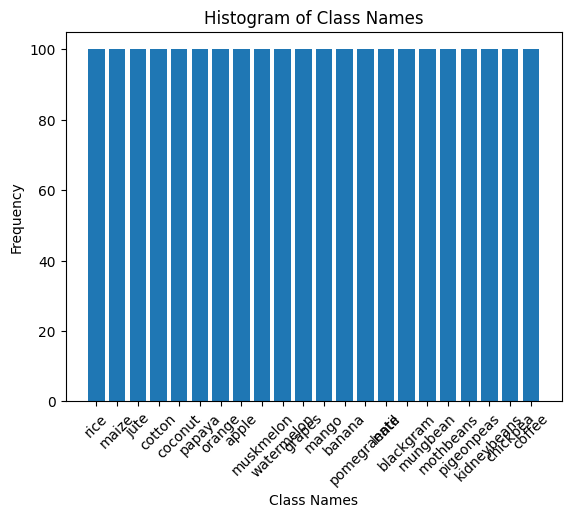

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffe

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("/content/Crop_recommendation.csv")
df.head()
df["label"].unique()
print('Number of missing values in the training dataset:',sum(df.isnull().sum()))
value_counts = df['label'].value_counts()

# Plot the histogram
plt.bar(value_counts.index, value_counts)

# Set labels and title
plt.xlabel('Class Names')
plt.ylabel('Frequency')
plt.title('Histogram of Class Names')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()
df.info()
category_counts = df['label'].value_counts()

# Display the counts
print(category_counts)
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# Apply label encoding to categorical columns
label_encoder = LabelEncoder()
for col in ['label']:
    df[col + '_encoded'] = label_encoder.fit_transform(df[col])

# Drop the original categorical columns
df_numeric = df.drop(['label'], axis=1)
# Count the number of records in each category
category_counts = df_numeric['label_encoded'].value_counts()

# Display the counts
print(category_counts)
df_numeric.info()
df_numeric.columns
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
y = df_numeric['label_encoded']
df_numeric.drop('label_encoded', axis=1, inplace=True)
#Normalize the data
scaler = MinMaxScaler()
X = scaler.fit_transform(df_numeric.values)  # Corrected
print(X)
print(y)
df_numeric.info()
features=df[['N','P','K','temperature','humidity','ph','rainfall']]
target=df['label']
labels=df['label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier
# Define and train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=10)  # Adjust parameters as needed
rf.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
# Evaluate accuracy
y_pred_rf=rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy}")

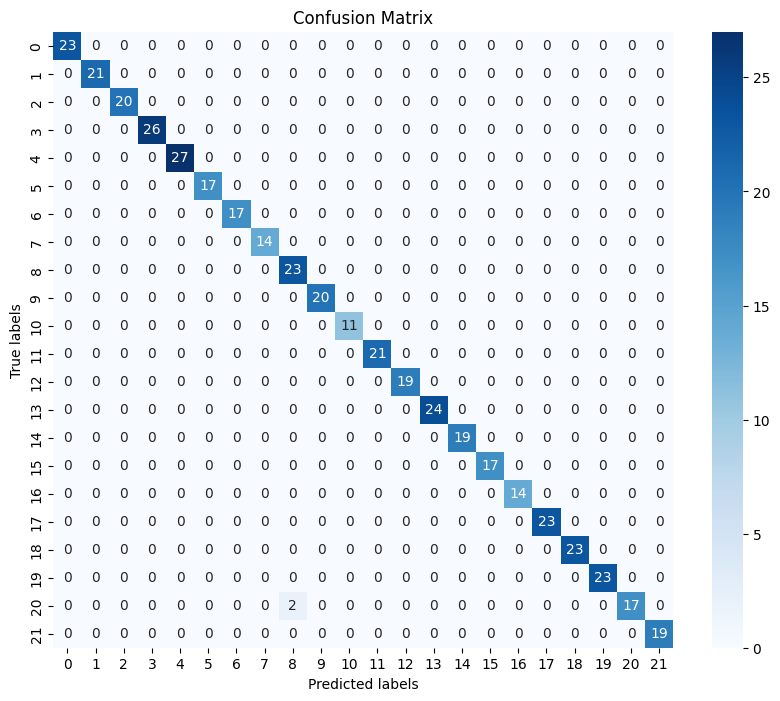

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

dt=DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
dt.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
# Evaluate accuracy
y_pred_dt=dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy}")

Accuracy: 0.865909090909091


In [ ]:
# Define and train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=10)  # Adjust parameters as needed
rf.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
# Evaluate accuracy
y_pred_rf=rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9954545454545455
